In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Partie 1:

In [141]:
def lotka_volterra(lapin_initial, renard_initial, alpha, beta, delta, gamma, step, num_lapins_renards):
    
    lapin = [lapin_initial]
    renard = [renard_initial]
    time = [0]
    
    for _ in range(0, num_lapins_renards):
        new_time = time[-1] + step
        new_lapins = (lapin[-1] * (alpha - beta * renard[-1])) * step + lapin[-1]
        new_renards = (renard[-1] * (delta * lapin[-1] - gamma)) * step + renard[-1]
        
        time.append(new_time)
        lapin.append(new_lapins)
        renard.append(new_renards)
    return time, lapin, renard

In [142]:
num_lapins_renards = 100_000
lapin_initial = 1
renard_initial = 2
alpha, beta, delta, gamma = 1, 1, 1, 1
step = 0.001
time = [0]

In [143]:
time, lapin, renard = lotka_volterra(lapin_initial, renard_initial, alpha, beta, delta, gamma, step, num_lapins_renards)

In [144]:
lapin_scaled = np.array(lapin) * 1000
renard_scaled = np.array(renard) * 1000


print(len(lapin_scaled))

100001


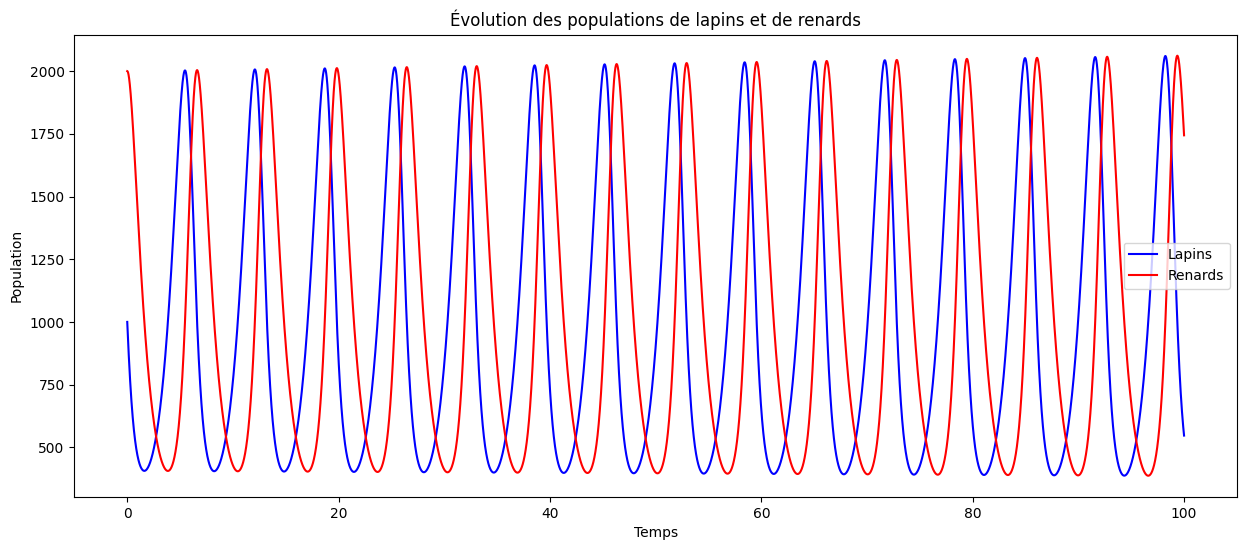

In [145]:
plt.figure(figsize=(15, 6))
plt.plot(time, lapin_scaled, "b-", label="Lapins")
plt.plot(time, renard_scaled, "r-", label="Renards") 
plt.xlabel("Temps")
plt.ylabel("Population")
plt.title("Évolution des populations de lapins et de renards")
plt.legend()
plt.show()


Partie 2:

In [146]:
df = pd.read_csv("populations_lapins_renards.csv")

In [147]:
lapin_df = df["lapin"].values
renard_df = df["renard"].values
date_df = df["date"].values

num_lapins_renards = len(df)

In [148]:
lapin_scaled_truncated = lapin_scaled[:num_lapins_renards]
renard_scaled_truncated = renard_scaled[:num_lapins_renards]

MSE

In [149]:
def calculate_mse(actual_values, predicted_values):
    num_observations = len(actual_values)
    mse = 0
    for index in range(num_observations):
        mse += ((actual_values[index] - predicted_values[index]) ** 2) / num_observations
    return mse

In [150]:
lapin_mse = calculate_mse(lapin_scaled_truncated, lapin_df)
renard_mse = calculate_mse(renard_scaled_truncated, renard_df)

print(f"MSE pour les lapins : {lapin_mse}")
print(f"MSE pour les renards : {renard_mse}")

MSE pour les lapins : 844359.170727547
MSE pour les renards : 1935824.1483228398


Grid search

In [151]:
# alpha_values = [1/3, 2/3, 1, 4/3]
# beta_values = [1/3, 2/3, 1, 4/3]
# gamma_values = [1/3, 2/3, 1, 4/3]
# delta_values = [1/3, 2/3, 1, 4/3]



# def grid_search(lapin_df, renard_df):
#     max_parameters = []
#     max_mse = 10 ** 10
    
#     for a in alpha_values:
#         for b in beta_values:
#             for d in delta_values:
#                 for g in gamma_values:
                    
#                     lapin_mse = calculate_mse(lapin_scaled_truncated, lapin_df)
#                     renard_mse = calculate_mse(renard_scaled_truncated, renard_df)
#                     mse = lapin_mse + renard_mse
                    
#                     if mse < max_mse:
#                         max_mse = mse
#                         max_parameters = [a, b, d, g]
#     return max_parameters, max_mse

In [152]:
# best_parameters, best_mse = grid_search(lapin_df, renard_df)
# print("Meilleurs paramètres trouvés : ", best_parameters)
# print("MSE minimal trouvé : ", best_mse)
